In [1]:
import os
import itertools
import cv2
import glob, random
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
from tqdm.notebook import tqdm
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
import sklearn
import clusteringv15 as myf

print("Setting up detection pipeline.\n")

# If required, create a face detection pipeline using MTCNN:
mtcnn = MTCNN(image_size=160, margin=0)

# Create an inception resnet (in eval mode):
resnet = InceptionResnetV1(pretrained='vggface2').eval()

Setting up detection pipeline.



<ipython-input-2-e35289ff22dc>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


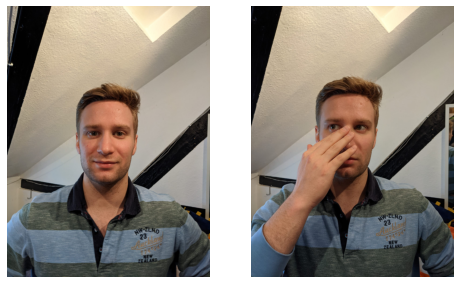

In [2]:
image1_name = 'felix01.jpeg'
image2_name = 'felix02.jpeg'

input1 = Image.open('./data/input_data/' + image1_name)
input1_cropped = mtcnn(input1,save_path='./data/input_data_aligned/' + image1_name)
input1_embedding = resnet(input1_cropped.unsqueeze(0))

input2 = Image.open('./data/input_data/' + image2_name)
input2_cropped = mtcnn(input2,save_path='./data/input_data_aligned/' + image2_name)
input2_embedding = resnet(input2_cropped.unsqueeze(0))

fig, axarray = plt.subplots(1,2,figsize=(8, 6))
axarray[0].imshow(input1)
axarray[0].axis('off')
axarray[1].imshow(input2)
axarray[1].axis('off')
fig.show()

In [3]:
cos = torch.nn.CosineSimilarity()

cos_score = cos(input1_embedding,input2_embedding)
npscore = cos_score.detach().numpy()[0]

threshold = 0.7
print('Score: ' + str(npscore))
print('Threshold: ' + str(threshold))
if npscore < threshold: print('Its not a match!')
else: print('Its a match!')

Score: 0.8326929
Threshold: 0.7
Its a match!


Face Analysis: Functions

In [2]:
# Making sure all necessary directories exists
from pathlib import Path
Path("./data/input_data_aligned").mkdir(parents=True, exist_ok=True)
Path("./data/temp/heatmaps").mkdir(parents=True, exist_ok=True)
Path("./data/temp/boxes").mkdir(parents=True, exist_ok=True)
Path("./data/temp/noise").mkdir(parents=True, exist_ok=True)
score_arrays=[]

Clear heatmap_savepath.
Clear boxes_savepath.
Clear noise_savepath.
Generating cluster embeddings........................................Finished!
Clear boxes_savepath.
Clear noise_savepath.
Generating cluster embeddings................................................................................................................................................................Finished!
Clear boxes_savepath.
Clear noise_savepath.
Generating cluster embeddings..........................................................................................................................................................................................................................................................Finished!
Clear boxes_savepath.
Clear noise_savepath.
Generating cluster embeddings............................................................................................................................................................................................................

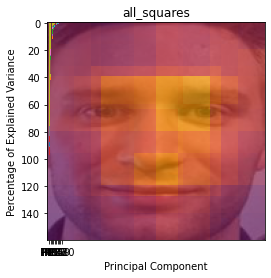

In [5]:
img1_path = './data/input_data_aligned/'+image1_name
img1 = Image.open(img1_path)
#img2 = Image.open('./data/input_data_aligned/04.jpg')
denominators = [2,4,5,8]
noise_factors = np.arange(0,1,0.1)

#clear heatmap datapath
print("Clear heatmap_savepath.")
heatmap_path = './data/temp/heatmaps/'
heatmap_data = list(itertools.chain(*(glob.glob(heatmap_path + '*.%s' % ext) for ext in ["jpg", "jpeg", "png"])))
for f in heatmap_data:
    os.remove(f)

#clustering image1
list_score_arrays = {}
chop_path = './data/temp/boxes/'
noise_path = './data/temp/noise/'
i=1
for nom in denominators:
    chops = myf.cluster_face(img1,denominator=nom,save_path=chop_path)
    new_comps = myf.cluster_embeddings(img1,noise_factors,chop_path,chops,mtcnn,resnet,save_path=noise_path)
    #pca
    score = myf.plot_pca(new_comps)
    #heatmap
    save_name = str(nom**2)+'_squares'
    pic = myf.plot_heat_map(chops,score,img_path=img1_path,save_path=heatmap_path,save_name=save_name)
    list_score_arrays[save_name] = pic
    i+=1
#merge all clusters
all_arrays = np.zeros((160,160))
cnorm = colors.Normalize(vmin=0, vmax=4)
for key in list_score_arrays:
    all_arrays = all_arrays + list_score_arrays[key]
score_arrays.append(all_arrays)
    
org_img = plt.imshow(Image.open(img1_path))
heatmap = plt.imshow(all_arrays, cmap='inferno', norm=cnorm, interpolation='nearest', alpha=0.6)
plt.savefig(heatmap_path + 'all_squares1.jpg')
plt.title('all_squares')
plt.show()

Clear heatmap_savepath.
Clear boxes_savepath.
Clear noise_savepath.
Generating cluster embeddings........................................Finished!
Clear boxes_savepath.
Clear noise_savepath.
Generating cluster embeddings................................................................................................................................................................Finished!
Clear boxes_savepath.
Clear noise_savepath.
Generating cluster embeddings..........................................................................................................................................................................................................................................................Finished!
Clear boxes_savepath.
Clear noise_savepath.
Generating cluster embeddings............................................................................................................................................................................................................

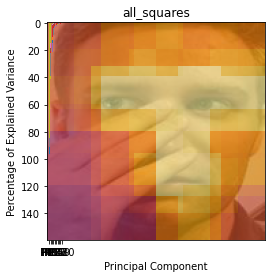

In [6]:
img2_path = './data/input_data_aligned/'+image2_name
img2 = Image.open(img2_path)
#img2 = Image.open('./data/input_data_aligned/04.jpg')
denominators = [2,4,5,8]
noise_factors = np.arange(0,1,0.1)

#clear heatmap datapath
print("Clear heatmap_savepath.")
heatmap_path = './data/temp/heatmaps/'
heatmap_data = list(itertools.chain(*(glob.glob(heatmap_path + '*.%s' % ext) for ext in ["jpg", "jpeg", "png"])))
for f in heatmap_data:
    os.remove(f)

#clustering image1
list_score_arrays = {}
chop_path = './data/temp/boxes/'
noise_path = './data/temp/noise/'
i=1
for nom in denominators:
    chops = myf.cluster_face(img2,denominator=nom,save_path=chop_path)
    new_comps = myf.cluster_embeddings(img2,noise_factors,chop_path,chops,mtcnn,resnet,save_path=noise_path)
    #pca
    score = myf.plot_pca(new_comps)
    #heatmap
    save_name = str(nom**2)+'_squares'
    pic = myf.plot_heat_map(chops,score,img_path=img2_path,save_path=heatmap_path,save_name=save_name)
    list_score_arrays[save_name] = pic
    i+=1
#merge all clusters
all_arrays = np.zeros((160,160))
cnorm = colors.Normalize(vmin=0, vmax=4)
for key in list_score_arrays:
    all_arrays = all_arrays + list_score_arrays[key]
score_arrays.append(all_arrays)    

org_img = plt.imshow(Image.open(img2_path))
heatmap = plt.imshow(all_arrays, cmap='inferno', norm=cnorm, interpolation='nearest', alpha=0.6)
plt.savefig(heatmap_path + 'all_squares2.jpg')
plt.title('all_squares')
plt.show()

In [7]:
boxes1, probs1, landmarks1 = mtcnn.detect(input1, landmarks=True)
boxes2, probs2, landmarks2 = mtcnn.detect(input2, landmarks=True)

eyes1, nose1, mouth1 = myf.get_feature_bboxes(img1, boxes1, landmarks1,save_path='./data/temp/landmarks/face1')
eyes2, nose2, mouth2 = myf.get_feature_bboxes(img2, boxes2, landmarks2,save_path='./data/temp/landmarks/face2')

from numpy import dot
from numpy.linalg import norm

Clear landmarks_savepath.
Clear landmarks_savepath.


In [8]:
score_eyes1 = score_arrays[0][eyes1[0]:eyes1[2],eyes1[1]:eyes1[3]]
score_eyes2 = score_arrays[1][eyes1[0]:eyes1[2],eyes1[1]:eyes1[3]]

vector_eyes1 = np.reshape(score_eyes1,-1)
vector_eyes2 = np.reshape(score_eyes2,-1) 

cos_sim = dot(vector_eyes1, vector_eyes2)/(norm(vector_eyes1)*norm(vector_eyes2))
print(cos_sim)

0.9834264708291661


In [9]:
score_nose1 = score_arrays[0][nose1[0]:nose1[2],nose1[1]:nose1[3]]
score_nose2 = score_arrays[1][nose1[0]:nose1[2],nose1[1]:nose1[3]]

vector_nose1 = np.reshape(score_nose1,-1)
vector_nose2 = np.reshape(score_nose2,-1) 

cos_sim = dot(vector_nose1, vector_nose2)/(norm(vector_nose1)*norm(vector_nose2))
print(cos_sim)

0.9957894408696693


In [10]:
score_mouth1 = score_arrays[0][mouth1[0]:mouth1[2],mouth1[1]:mouth1[3]]
score_mouth2 = score_arrays[1][mouth1[0]:mouth1[2],mouth1[1]:mouth1[3]]

vector_mouth1 = np.reshape(score_mouth1,-1) 
vector_mouth2 = np.reshape(score_mouth2,-1) 

cos_sim = dot(vector_mouth1, vector_mouth2)/(norm(vector_mouth1)*norm(vector_mouth2))

print(cos_sim)

0.9917405297810201


In [11]:
print(vector_eyes1,vector_eyes2)

[1.44831641 1.44831641 1.44831641 ... 1.8121697  1.8121697  1.8121697 ] [2.94995824 2.94995824 2.94995824 ... 2.10695036 2.10695036 2.10695036]
